# Employee Attrition 29

# by:
###    Eden_Shmuel
###    Maor_Beker
###    Shirel_Tal
###    Eden_Bilya

<div>
<img src='https://raw.githubusercontent.com/Edenshmuel/Data-analyst/main/Data_project/attrition.png' width="800"/>
</div>

## source:
#### https://www.kaggle.com/datasets/colearninglounge/employee-attrition?select=employee_attrition_train.csv

***

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 2)

In [34]:
url = 'https://raw.githubusercontent.com/Edenshmuel/Data-analyst/main/Data_project/employee_attrition_train.csv'
attrition_df = pd.read_csv(url)

# Description about the data:
### Employee attrition is the gradual reduction in employee numbers.
### Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving at a faster rate than new ones are hired.

### The key to success in any organization is attracting and retaining top talent.
### Given in the data is a set of data points on the employees who are either currently working within the company or have resigned.
### The objective is to identify and improve these factors to prevent loss of good people.

In [35]:
attrition_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3


### Check for missing values:

In [36]:
attrition_df.isnull().sum().sort_values(ascending=False)

Age                         136
DistanceFromHome             95
DailyRate                    27
MaritalStatus                 5
BusinessTravel                5
Department                    0
NumCompaniesWorked            0
YearsSinceLastPromotion       0
YearsInCurrentRole            0
YearsAtCompany                0
WorkLifeBalance               0
TrainingTimesLastYear         0
TotalWorkingYears             0
StockOptionLevel              0
StandardHours                 0
RelationshipSatisfaction      0
PerformanceRating             0
PercentSalaryHike             0
OverTime                      0
Over18                        0
MonthlyRate                   0
MonthlyIncome                 0
Attrition                     0
JobSatisfaction               0
JobRole                       0
JobLevel                      0
JobInvolvement                0
HourlyRate                    0
Gender                        0
EnvironmentSatisfaction       0
EmployeeNumber                0
Employee

### Dealing with the missing relevant values:

In [37]:
attrition_df = attrition_df.dropna(subset = ['BusinessTravel', 'MaritalStatus']).copy(deep = False)
attrition_df['DistanceFromHome'].fillna(attrition_df['DistanceFromHome'].mean(), inplace=True)
attrition_df.isnull().sum().sort_values(ascending=False)

Age                         136
DailyRate                    27
StandardHours                 0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
MonthlyIncome                 0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
MonthlyRate                   0
MaritalStatus                 0
Attrition                     0
JobSatisfaction               0
JobRole                       0
JobLevel                      0
JobInvolvement                0
HourlyRate                    0
Gender                        0
EnvironmentSatisfaction       0
EmployeeNumber                0
EmployeeCount                 0
EducationField                0
Education                     0
Distance

### In some cases we want to convert the "Attrition" to a number, so we create a variable that will regularly contain:
### "Yes" = 1
### "No" = 0

In [38]:
df_binary_values= attrition_df.copy(deep = False)
df_binary_values['Attrition_b_v'] = df_binary_values['Attrition'].astype('category').cat.codes

In [39]:
df_binary_values.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_b_v
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.00000,2,Medical,1,997,...,80,1,32,1,2,5,4,1,3,0
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.00000,2,Medical,1,178,...,80,2,7,0,3,3,2,0,1,0
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.00000,1,Marketing,1,1780,...,80,0,1,3,3,1,0,1,0,1
3,50.0,No,Travel_Frequently,1246.0,Human Resources,9.95027,3,Medical,1,644,...,80,1,32,2,3,32,5,10,7,0
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.00000,4,Life Sciences,1,1118,...,80,0,18,4,3,8,6,4,0,0


## The amount of attritioned employees in the company:

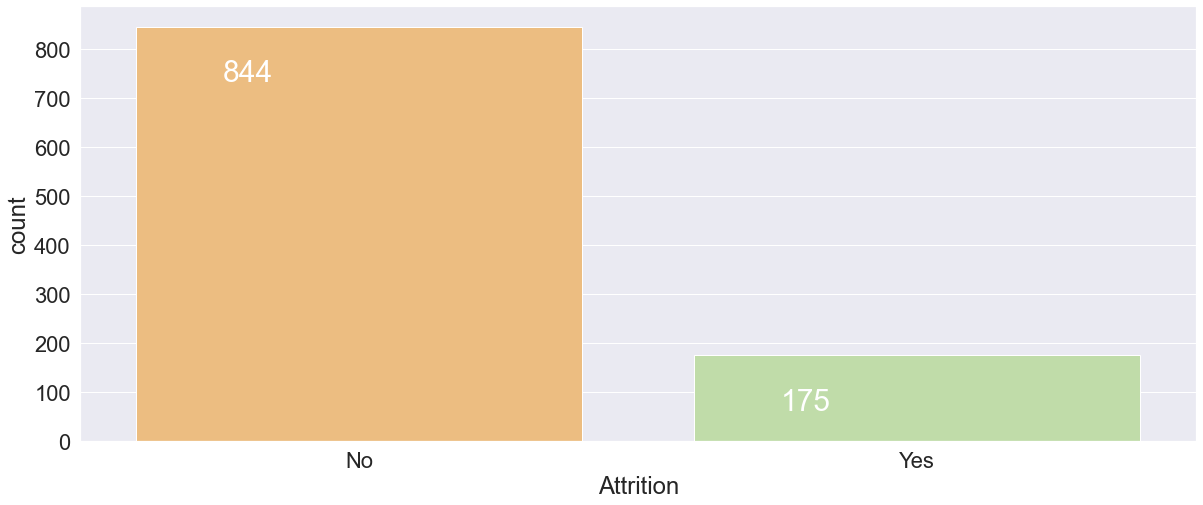

In [40]:
plt.figure(figsize = (20,8))
ax = sns.countplot(data = attrition_df,  x = 'Attrition', palette = 'Spectral')
for num in ax.patches:
    ax.annotate(f'\n{num.get_height()}', (num.get_x()+0.2, num.get_height()), ha='center', va='top', color='white', size=30)

## Is there a connection between attrition and business travel?

### we will create a new column which will separate employees who took business flights and those who didn't.

In [41]:
attrition_VS_travel = df_binary_values.copy(deep = False)
for index,row in attrition_VS_travel.iterrows():
    if ((attrition_VS_travel.loc[index, 'BusinessTravel'] == 'Travel_Rarely') |
                                        (attrition_VS_travel.loc[index, 'BusinessTravel'] == 'Travel_Frequently')):
        attrition_VS_travel.loc[index, 'Business_Travel'] = 'Travel'
    else:
        attrition_VS_travel.loc[index, 'Business_Travel'] = 'None'

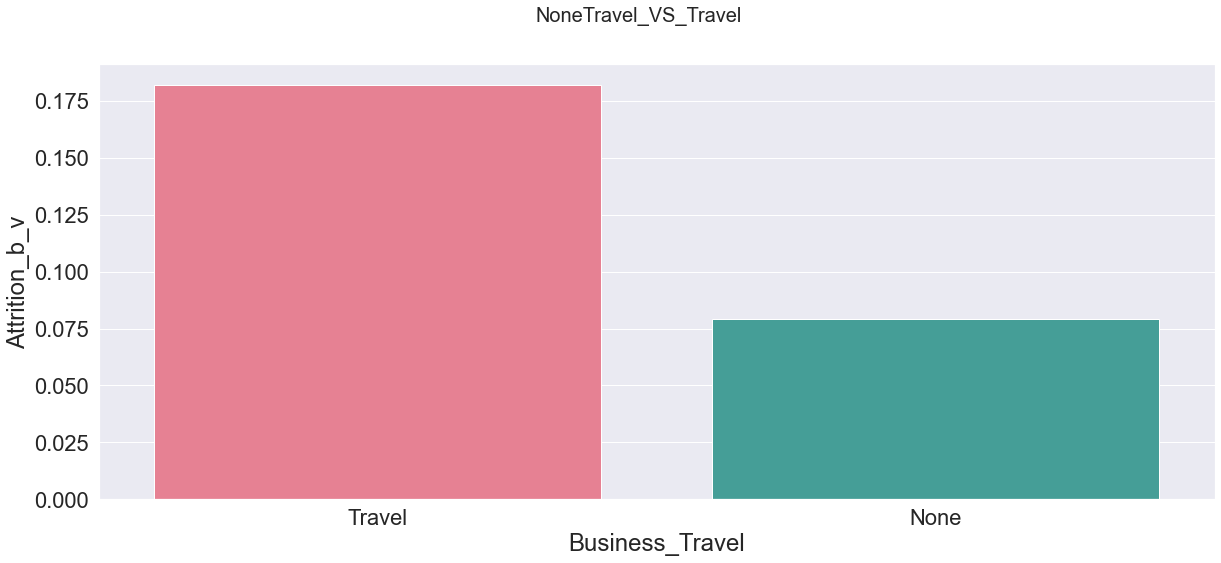

In [42]:
plt.figure(figsize = (20,8))
plt.suptitle('NoneTravel_VS_Travel', size = 20)
sns.barplot(data = attrition_VS_travel, x = 'Business_Travel', y = 'Attrition_b_v', palette = 'husl', ci = None);

## It can be seen that the amount of attrition is much greater in the group of people who travel in their job compared to those who do not travel.

### We will check whether there is a relation between the frequency of travel and the number of attrition:

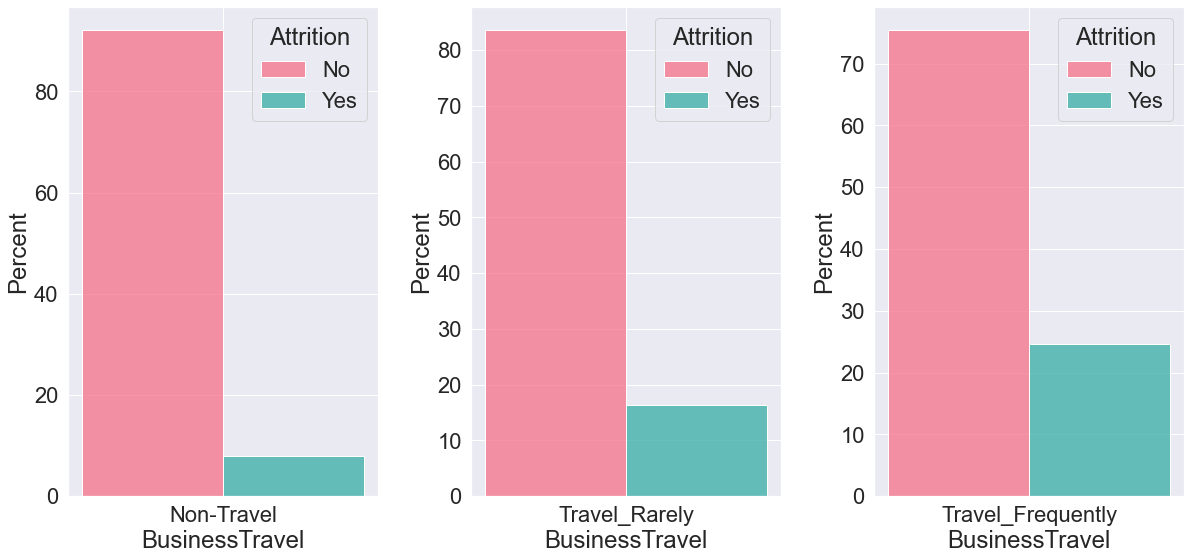

In [43]:
fig, ax = plt.subplots(ncols = 3, figsize = (20,9))
plt.subplots_adjust(wspace = 0.3)
sns.histplot(data = attrition_df[attrition_df.BusinessTravel=='Non-Travel'], x = 'BusinessTravel' ,hue = 'Attrition', stat = 'percent', multiple = 'dodge', shrink = .8, ax = ax[0], palette = 'husl')
sns.histplot(data = attrition_df[attrition_df.BusinessTravel=='Travel_Rarely'], x = 'BusinessTravel' ,hue = 'Attrition', stat = 'percent', multiple = 'dodge', shrink = .8, ax = ax[1], palette = 'husl')
sns.histplot(data = attrition_df[attrition_df.BusinessTravel=='Travel_Frequently'], x = 'BusinessTravel' ,hue = 'Attrition', stat = 'percent', multiple = 'dodge', shrink = .8,ax = ax[2], palette = 'husl');

# Conclusion
## The more the employees travels, the chances of attrition rises.

<div>
<img src='https://raw.githubusercontent.com/Edenshmuel/Data-analyst/main/Data_project/image%20businesstravel.webp' width="800"/>
</div>

## We will compare the employee attrition ratio to job level ratio:

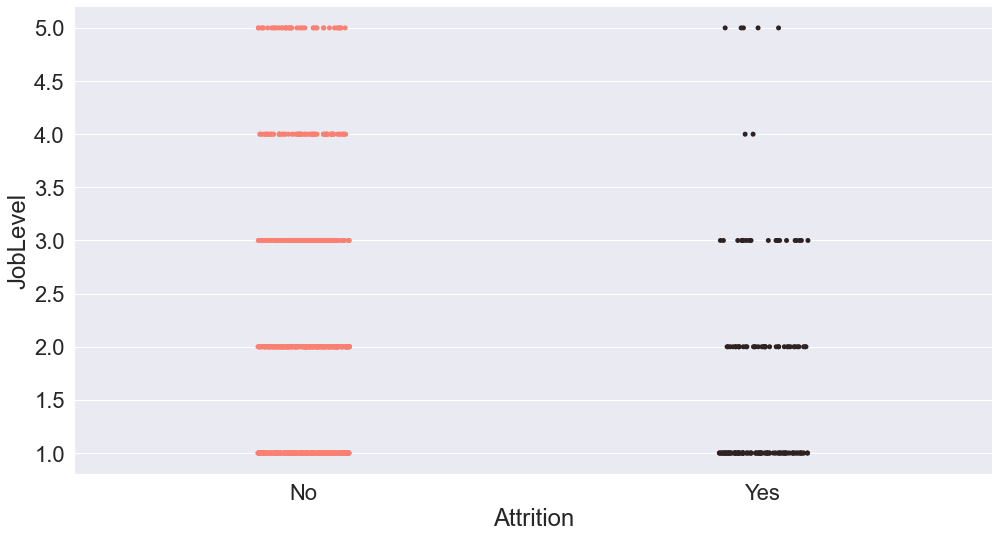

In [44]:
sns.catplot(data = attrition_df, x = 'Attrition', y = 'JobLevel', height=8, aspect=1.8, palette = 'dark:salmon_r');

## According to the graph above we can see that job level 1 holds the highest employee attrition ratio

### Now we will compare employees marital status to attrition ratio

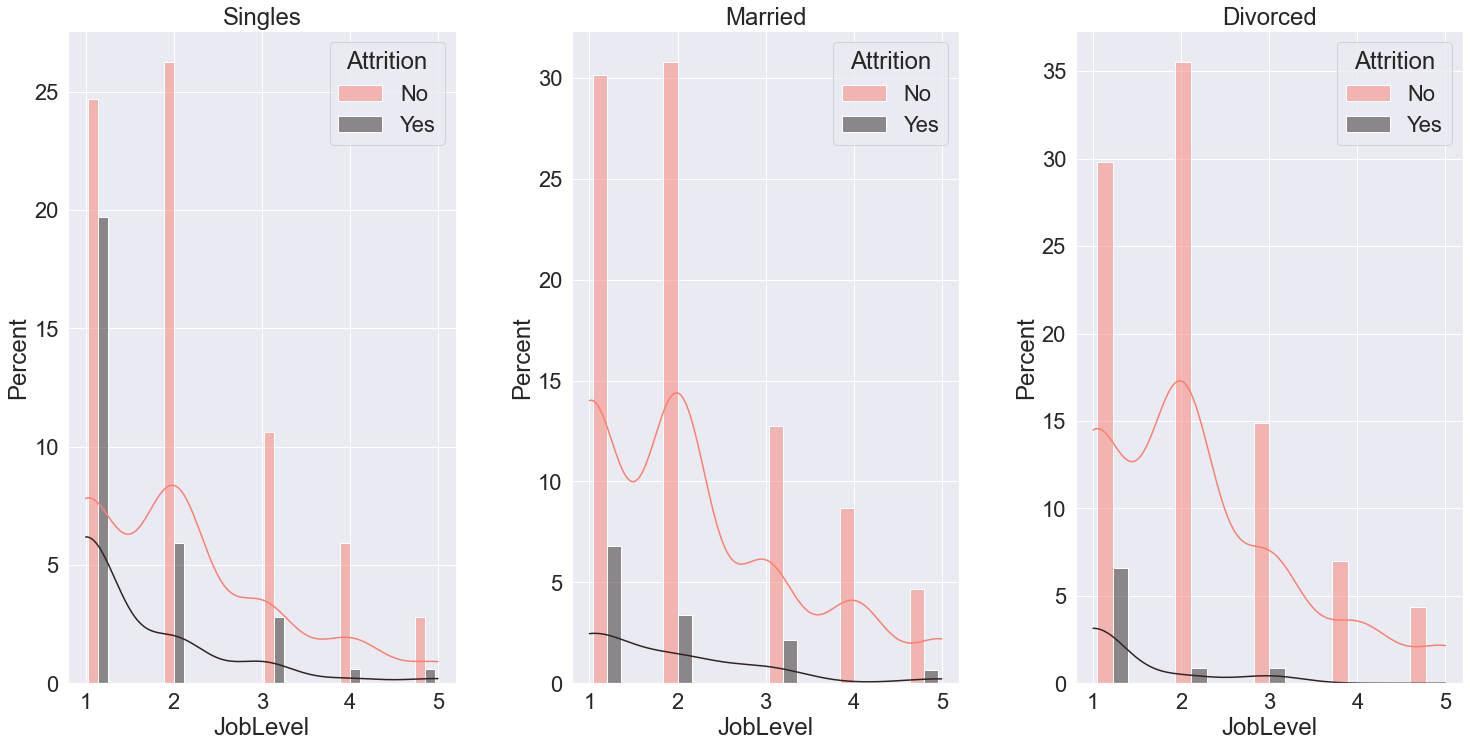

In [45]:
fig, ax = plt.subplots(ncols=3, figsize = (25,12))
plt.subplots_adjust(wspace = 0.3)
sns.histplot(data = attrition_df[attrition_df.MaritalStatus=='Single'], x = 'JobLevel' ,hue = 'Attrition', stat = "percent", multiple = 'dodge', shrink = .8, ax = ax[0], palette = 'dark:salmon_r', kde = True, hue_order = ['No','Yes']).set(title = 'Singles')   
sns.histplot(data = attrition_df[attrition_df.MaritalStatus=='Married'], x = 'JobLevel' ,hue = 'Attrition', stat = "percent", multiple = 'dodge', shrink = .8, ax = ax[1], palette = 'dark:salmon_r', kde = True).set(title = 'Married')   
sns.histplot(data = attrition_df[attrition_df.MaritalStatus=='Divorced'], x = 'JobLevel' ,hue = 'Attrition', stat = "percent", multiple = 'dodge', shrink = .8, ax = ax[2], palette = 'dark:salmon_r', kde = True).set(title = 'Divorced');  

## From the graph it can be seen that although the singles are more attritioned, the pattern is the same for married and divorced people, all having the most attritioned employees at job level 1.

### We will focus on job level 1 and create a new column which will separate attritioned employees to two groups those who hold a degree and those who dont

In [46]:
Education_VS_attrition = attrition_df.copy(deep = False)
for index,row in attrition_df.iterrows():
    if Education_VS_attrition.loc[index, 'Education'] <3 :
         Education_VS_attrition.loc[index, 'Phase'] = 'No Degree'
    else:
         Education_VS_attrition.loc[index, 'Phase'] = 'Bachelor or above'

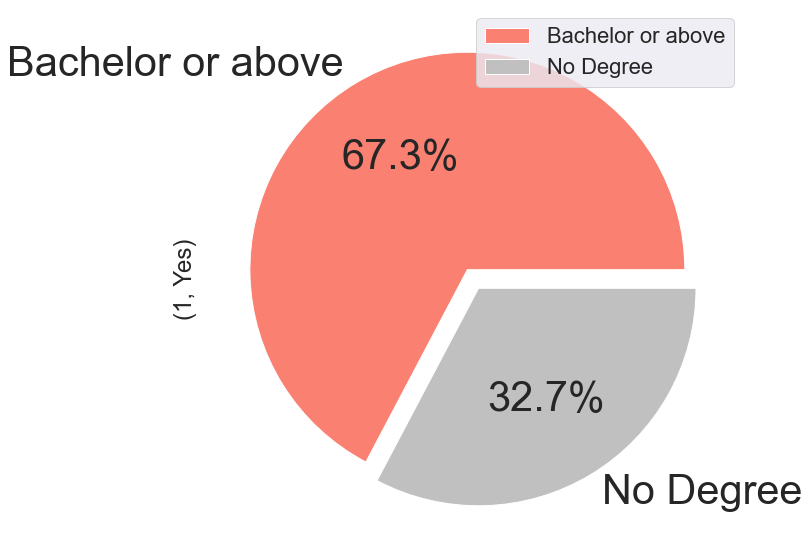

In [47]:
pivot = pd.pivot_table(Education_VS_attrition.loc[(Education_VS_attrition.JobLevel == 1)&(Education_VS_attrition.Attrition == 'Yes')], index = ['Phase'], columns = ['JobLevel','Attrition'], values= ['EmployeeCount'], aggfunc = 'count')
colors = ['salmon', 'silver']
explode = (0.05, 0.05)
pivot.groupby(['Phase']).sum().plot(kind = 'pie' ,subplots = True, figsize = (20,10), y = 'EmployeeCount', autopct = '%1.1f%%', colors=colors, textprops = {'size' : 'xx-large'}, explode=explode);

# Conclusion
## Most of the attritioned employees are those who are at the start of their career and have a degree

# 


## Is there a connection between the number of years that have passed since the last promotion and attrition?

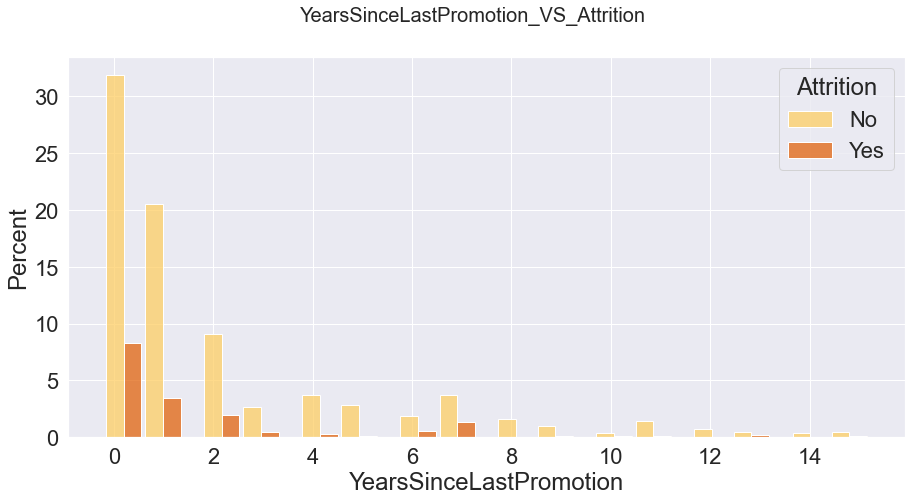

In [48]:
fig = plt.figure(figsize = (15,7))
plt.suptitle('YearsSinceLastPromotion_VS_Attrition', size = 20)
sns.histplot(data = attrition_df, x = 'YearsSinceLastPromotion', hue = 'Attrition', stat = 'percent', multiple = 'dodge', shrink = 1.8, palette = 'YlOrBr');

## Most of the attritioned employees are those who have been promoted in the last two years.


### We will analyze the attrition of employees who have been promoted in the last two years in terms of salary.
### We would like to examine the median wage:

In [49]:
median_monthly_income = attrition_df['MonthlyIncome'].median()
median_monthly_income

4739.0

### we will create a new column which will separate employees above and below the median.

In [50]:
employee_data = attrition_df.copy(deep = False)
for index,row in employee_data.iterrows():
    if employee_data.loc[index,'MonthlyIncome']< median_monthly_income:
         employee_data.loc[index,'median_salary'] = 'Under'
    else:
         employee_data.loc[index,'median_salary'] = 'above'   

### we wanted to examine the ratio between the median salary compared to the employees who got promoted in the last 2 years.


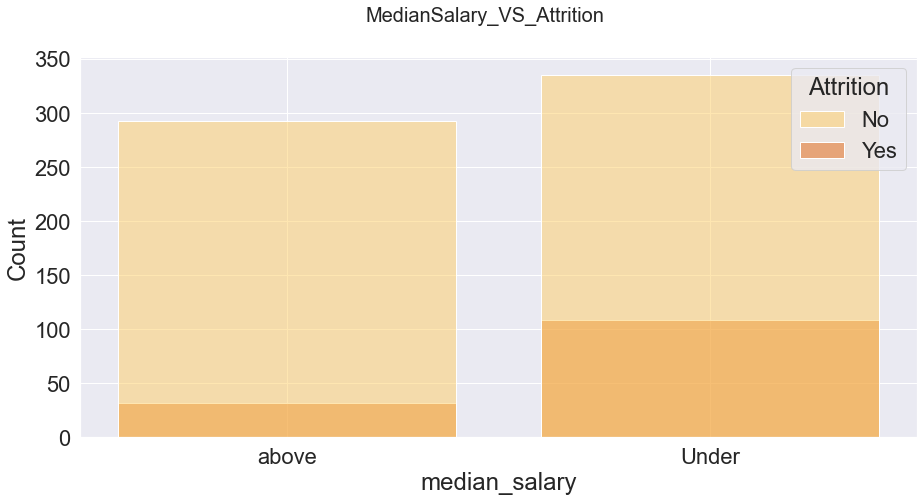

In [51]:
fig = plt.figure(figsize = (15,7))
plt.suptitle('MedianSalary_VS_Attrition', size = 20)
sns.histplot(data = employee_data[employee_data.YearsSinceLastPromotion <= 2],x = 'median_salary', hue = 'Attrition', stat = 'count' ,shrink = 0.8, palette = 'YlOrBr');

## It can be seen that in the group of attritioned employees who got recently promoted, most of them recieved below the median salary.

### Let's check how salary affects the rate of attrition. 

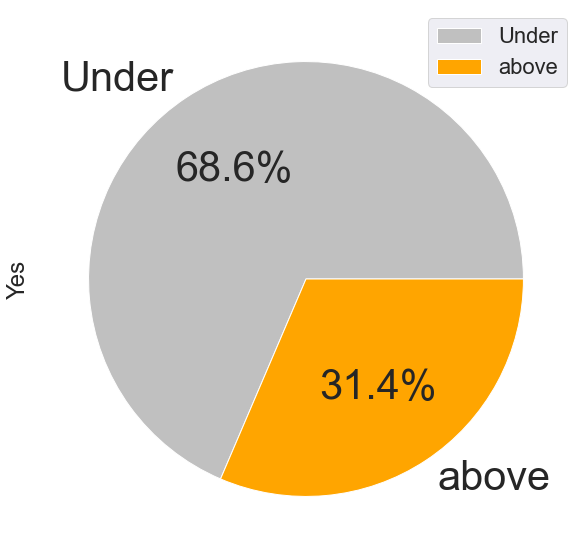

In [52]:
colors = ['silver', 'orange']
pivot = pd.pivot_table(employee_data[employee_data.Attrition=='Yes'], index = 'median_salary', columns = 'Attrition', values = 'EmployeeCount', aggfunc = 'count')
pivot.groupby(['median_salary']).sum().plot(kind = 'pie', subplots = True, autopct = '%1.1f%%', figsize = (15,10), colors = colors, textprops = {"size" : "xx-large"});

# Conclusion:
## Most of the attritioned employees are those who have been promoted in the last two years and are paid below a median rate.
## Generally attritioned employees recieved less than the median salary rate. 

<div>
<img src='https://raw.githubusercontent.com/Edenshmuel/Data-analyst/main/Data_project/image%20salary.webp' width="800"/>
</div>

###
# Thanks for listening

<div>
<img src='https://raw.githubusercontent.com/Edenshmuel/Data-analyst/main/Data_project/employee-attrition.jpg' width="800"/>
</div>